# Exploratory Data Analysis (EDA)

In this step we explore the dataset to understand distributions, missing values, correlations, and outliers.  
We also visualize histograms, scatter plots, and a correlation matrix.


In [1]:
import pandas as pd
from pathlib import Path

BASE = Path.cwd().parent if Path.cwd().name=="notebooks" else Path.cwd()
DATA = BASE/"data"/"processed"/"merged_coin_gecko.csv"

df = pd.read_csv(DATA, parse_dates=["date"], low_memory=False)
print("Shape:", df.shape)
print("Columns:", list(df.columns))
df.head()


Shape: (993, 11)
Columns: ['coin', 'symbol', 'price', '1h', '24h', '7d', '24h_volume', 'mkt_cap', 'date', 'source_file', 'liquidity_ratio']


,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date,source_file,liquidity_ratio
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16,coin_gecko_2022-03-16.csv,0.045903
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16,coin_gecko_2022-03-16.csv,0.060374
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16,coin_gecko_2022-03-16.csv,0.724503
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16,coin_gecko_2022-03-16.csv,0.021795
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16,coin_gecko_2022-03-16.csv,0.074150


### Missing Value Analysis
Check how many missing values exist per column.


In [2]:
na = df.isna().sum().sort_values(ascending=False)
print("Top 10 columns with NAs:\n", na.head(10))


Top 10 columns with NAs:
 coin           0
symbol         0
price          0
1h             0
24h            0
7d             0
24h_volume     0
mkt_cap        0
date           0
source_file    0
dtype: int64


In [3]:
num_cols = df.select_dtypes(include="number").columns.tolist()
df[num_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
price,993.0,6.194355e+02,4.419811e+03,1.484000e-09,1.944270e-01,1.100000e+00,7.150000e+00,4.121727e+04
1h,993.0,9.723061e-03,2.693430e-02,-7.040000e-01,1.000000e-03,6.000000e-03,1.900000e-02,9.500000e-02
24h,993.0,2.373716e-02,5.930299e-02,-6.460000e-01,1.000000e-03,1.600000e-02,3.500000e-02,5.770000e-01
7d,993.0,2.353474e-02,2.296666e-01,-5.580000e-01,-4.100000e-02,0.000000e+00,3.700000e-02,4.608000e+00
24h_volume,993.0,2.893109e+08,2.769908e+09,0.000000e+00,1.766976e+06,8.343005e+06,4.003652e+07,5.793497e+10
mkt_cap,993.0,3.780941e+09,3.817057e+10,6.577043e+07,1.158653e+08,2.135646e+08,6.025829e+08,7.760774e+11
liquidity_ratio,993.0,1.037429e-01,3.669317e-01,0.000000e+00,8.774389e-03,3.379844e-02,8.833229e-02,5.948545e+00


In [4]:
print("Liquidity ratio range:", df["liquidity_ratio"].min(), "to", df["liquidity_ratio"].max())
df["liquidity_ratio"].describe()


Liquidity ratio range: 0.0 to 5.9485448576620605


count    993.000000
mean       0.103743
std        0.366932
min        0.000000
25%        0.008774
50%        0.033798
75%        0.088332
max        5.948545
Name: liquidity_ratio, dtype: float64

In [5]:
by_coin = df.groupby("coin").agg(
    n_rows=("coin","size"),
    first_date=("date","min"),
    last_date=("date","max")
).sort_values("n_rows", ascending=False)
by_coin.head(20)


,n_rows,first_date,last_date
coin,,,
0x,2,2022-03-16,2022-03-17
Prometeus,2,2022-03-16,2022-03-17
RSK Infrastructure Framework,2,2022-03-16,2022-03-17
RMRK,2,2022-03-16,2022-03-17
RIZON,2,2022-03-16,2022-03-17
REN,2,2022-03-16,2022-03-17
QuarkChain,2,2022-03-16,2022-03-17
Quant,2,2022-03-16,2022-03-17
Qtum,2,2022-03-16,2022-03-17


### Histograms
Distribution of numeric features to detect skewness and outliers.


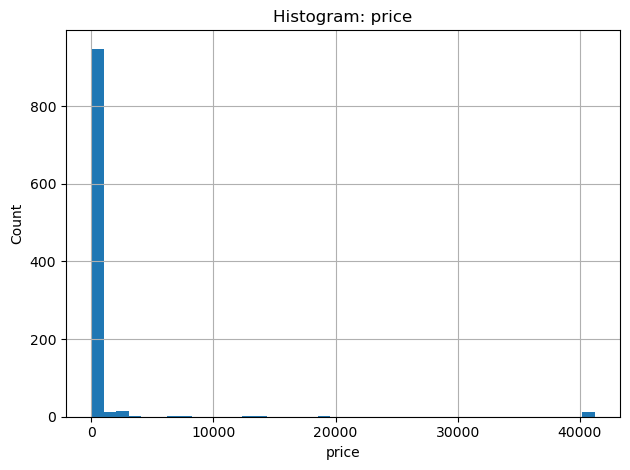

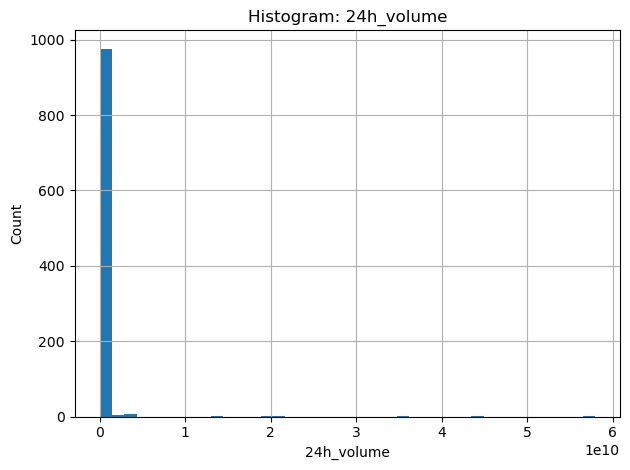

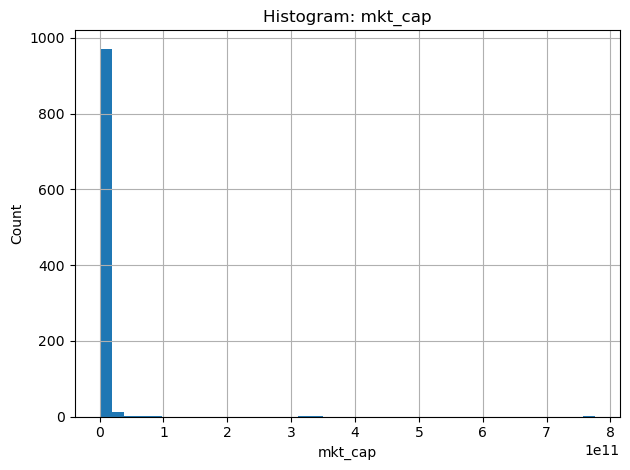

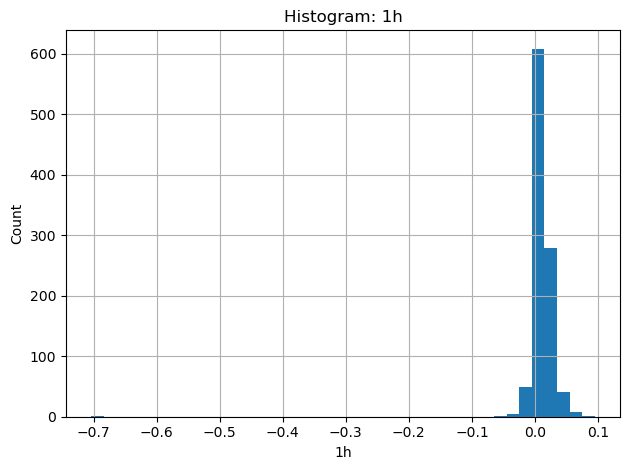

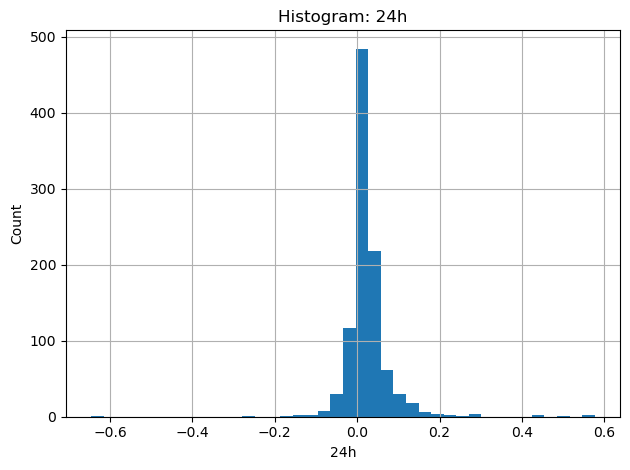

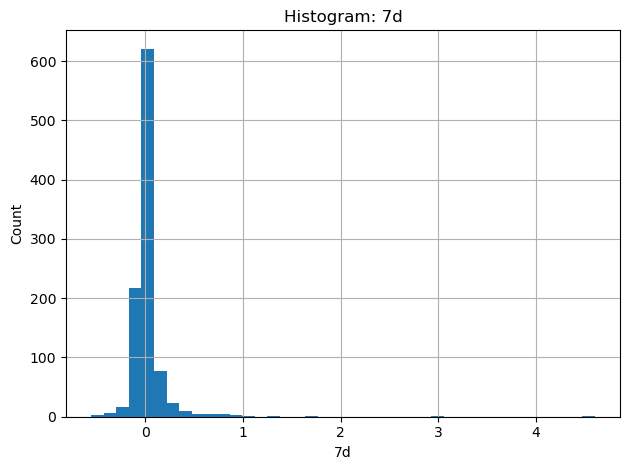

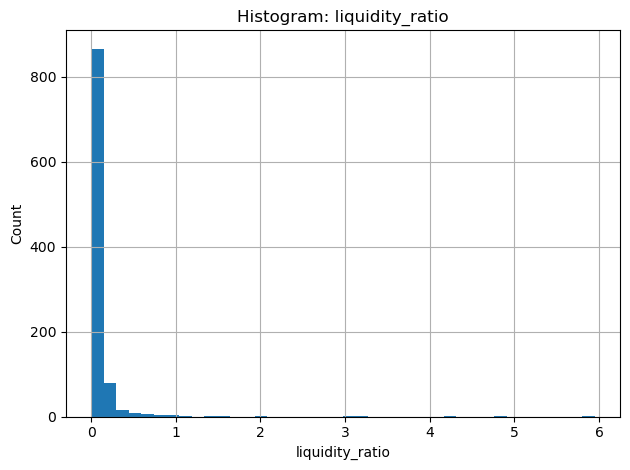

In [6]:
import matplotlib.pyplot as plt
from pathlib import Path

BASE = Path.cwd().parent if Path.cwd().name=="notebooks" else Path.cwd()
FIGS = BASE/"artifacts"/"figures"; FIGS.mkdir(parents=True, exist_ok=True)

for c in ["price","24h_volume","mkt_cap","1h","24h","7d","liquidity_ratio"]:
    if c in df.columns:
        ax = df[c].hist(bins=40)
        ax.set_title(f"Histogram: {c}")
        ax.set_xlabel(c); ax.set_ylabel("Count")
        plt.tight_layout()
        plt.savefig(FIGS/f"hist_{c}.png", dpi=120)
        plt.show()


**Observation:**  
Most coins have very small trading volumes compared to a few very large coins. This shows the market is highly skewed, which may affect model training.


### Correlation Matrix
Check relationships between features and the target.

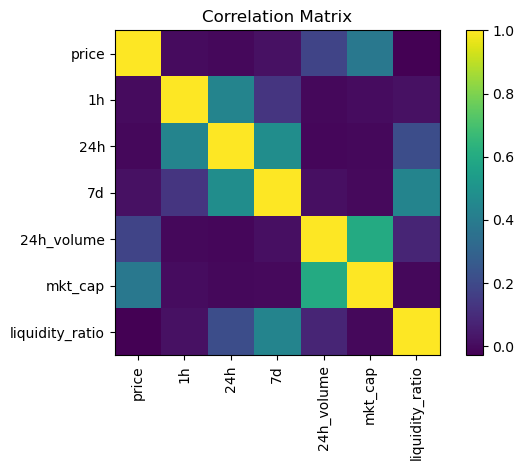

liquidity_ratio    1.000000
7d                 0.437313
24h                0.214051
24h_volume         0.079588
1h                 0.018234
mkt_cap           -0.007357
price             -0.028418
Name: liquidity_ratio, dtype: float64

In [7]:
import numpy as np
import matplotlib.pyplot as plt

num_cols = df.select_dtypes(include=np.number).columns.tolist()
corr = df[num_cols].corr(numeric_only=True)

plt.imshow(corr, interpolation="nearest")
plt.title("Correlation Matrix")
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.colorbar()
plt.tight_layout()
plt.savefig(FIGS/"corr_matrix.png", dpi=120)
plt.show()

corr["liquidity_ratio"].sort_values(ascending=False)


**Observation:**  
Liquidity ratio has weak correlation with price/returns, but is somewhat related to volume and market cap. This means engineered features may help capture patterns.


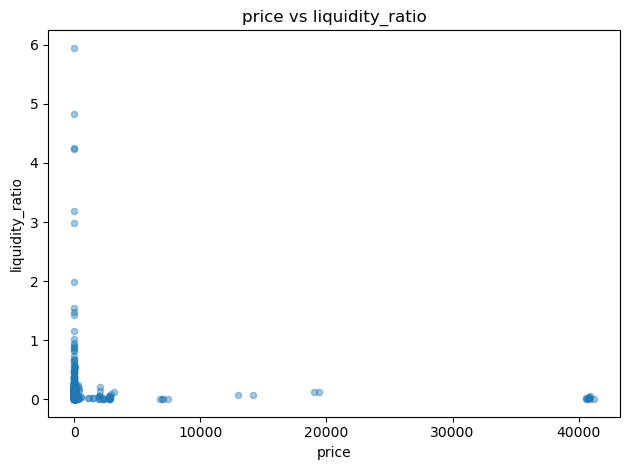

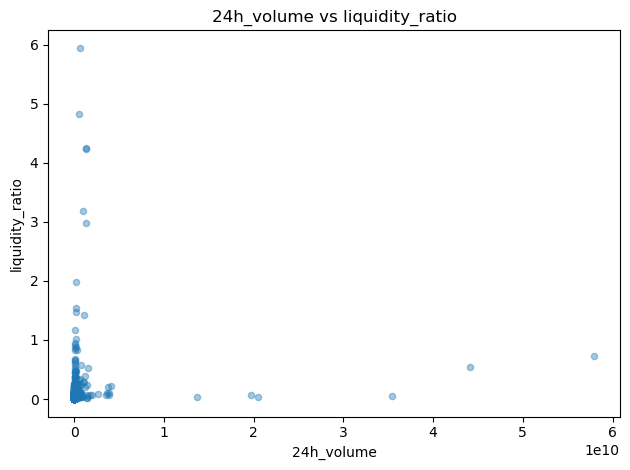

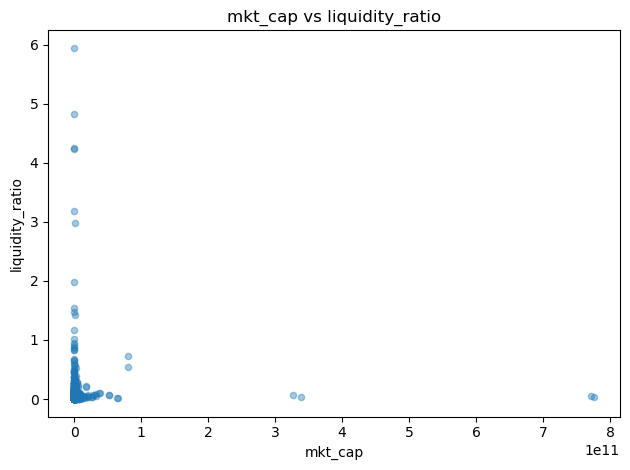

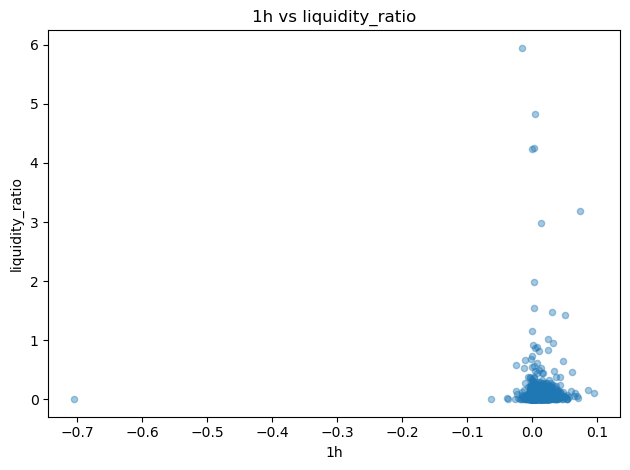

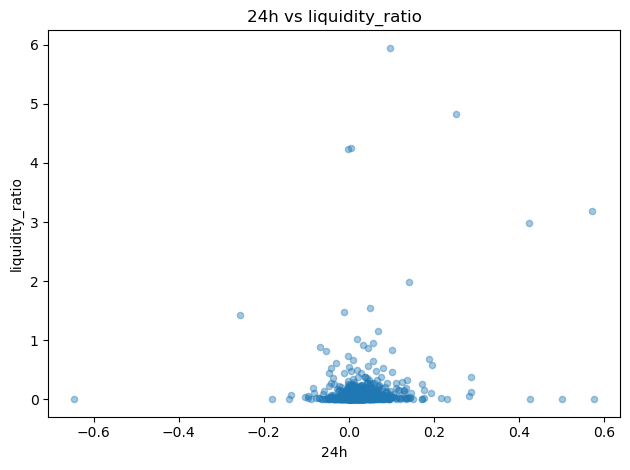

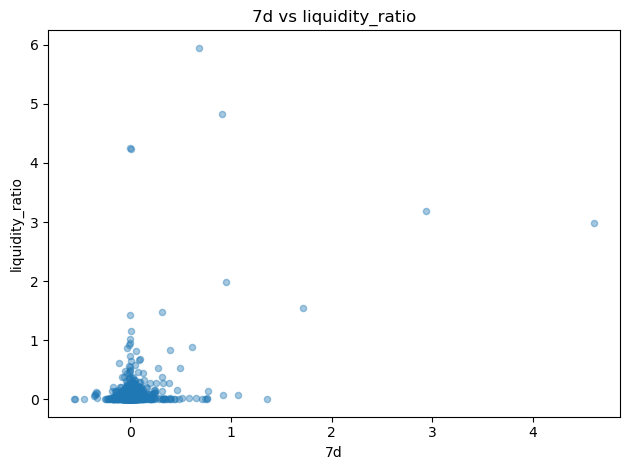

In [8]:
import matplotlib.pyplot as plt

for c in ["price","24h_volume","mkt_cap","1h","24h","7d"]:
    if c in df.columns:
        df.plot(kind="scatter", x=c, y="liquidity_ratio", alpha=0.4)
        plt.title(f"{c} vs liquidity_ratio")
        plt.tight_layout()
        plt.savefig(FIGS/f"scatter_{c}_vs_lr.png", dpi=120)
        plt.show()


In [9]:
top_lr = df.sort_values("liquidity_ratio", ascending=False).head(15)
bot_lr = df.sort_values("liquidity_ratio", ascending=True).head(15)
display(top_lr[["coin","price","24h_volume","mkt_cap","liquidity_ratio","date"]])
display(bot_lr[["coin","price","24h_volume","mkt_cap","liquidity_ratio","date"]])


,coin,price,24h_volume,mkt_cap,liquidity_ratio,date
885,JasmyCoin,0.023129,6.576315e+08,110553343.0,5.948545,2022-03-17
408,JasmyCoin,0.021232,4.802617e+08,99367227.0,4.833200,2022-03-16
186,FLEX Coin,3.970000,1.326196e+09,311600507.0,4.256079,2022-03-16
689,FLEX Coin,3.950000,1.321112e+09,311501806.0,4.241107,2022-03-17
182,STEPN,0.534126,1.013705e+09,318571623.0,3.182031,2022-03-16
652,STEPN,0.761181,1.358531e+09,456251258.0,2.977594,2022-03-17
877,Alpine F1 Team Fan Token,10.000000,2.266640e+08,114038968.0,1.987601,2022-03-17
406,Alpine F1 Team Fan Token,8.760000,1.535219e+08,99922202.0,1.536414,2022-03-16
334,Polkastarter,1.540000,2.001325e+08,135061007.0,1.481793,2022-03-16
600,ApeCoin,7.720000,1.129583e+09,794922002.0,1.420999,2022-03-17


,coin,price,24h_volume,mkt_cap,liquidity_ratio,date
326,Pundi X [OLD],6.009919e-04,0.00,1.421462e+08,0.000000e+00,2022-03-16
52,cUSDC,2.253301e-02,41.83,2.449140e+09,1.707946e-08,2022-03-16
58,cDAI,2.189579e-02,93.89,1.942223e+09,4.834152e-08,2022-03-16
557,cDAI,2.193790e-02,187.54,1.928857e+09,9.722859e-08,2022-03-17
462,bZx Protocol,1.779630e-01,16.65,7.418663e+07,2.244340e-07,2022-03-16
40,cETH,5.371000e+01,1088.54,3.191012e+09,3.411269e-07,2022-03-16
549,cUSDC,2.255757e-02,1167.72,2.466485e+09,4.734350e-07,2022-03-17
928,bZx Protocol,6.280911e-02,43.49,8.897184e+07,4.888063e-07,2022-03-17
537,cETH,5.652000e+01,4709.81,3.354874e+09,1.403871e-06,2022-03-17
114,Nexus Mutual,9.251000e+01,1909.73,6.337504e+08,3.013379e-06,2022-03-16
